In [1]:
import pandas as pd
import numpy as np 
import os
# import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
# read CSV into a pandas dataframe
# download it here:
# https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/YPRQH8
df = pd.read_csv('wgnd_noctry.csv',low_memory=False)

In [2]:
# exclude rows where gender is undefined
df = df[df.gender.isin(['M', 'F'])]
# define input
x = df.name
# define labels (female = 0, male = 1)
y = df.gender

F    98865
M    67351
Name: gender, dtype: int64

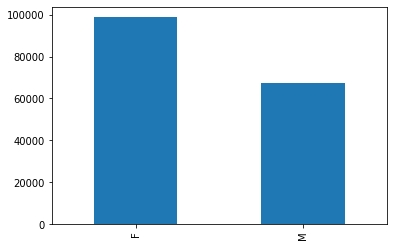

In [3]:
df.gender.value_counts().plot(kind="bar")
df.gender.value_counts()

In [4]:
df.gender.replace({'F':0,'M':1},inplace=True)
df.head()

,name,gender
0,A HANNAN,1
1,A JAY,1
2,A K I L,1
3,A LAH,0
7,A RIN,0


In [9]:
cv = CountVectorizer()
X = cv.fit_transform(x)
cv.get_feature_names_out()[:5]

array(['aa', 'aaban', 'aabas', 'aabeer', 'aabel'], dtype=object)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.6196907712669956

In [12]:
print("Validation Accuracy",clf.score(x_test,y_test)*100,"%")
print("Training Accuracy",clf.score(x_train,y_train)*100,"%")

Validation Accuracy 61.96907712669956 %
Training Accuracy 99.64804620521613 %


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    MultinomialNB()]

for name, clf in zip(names, classifiers):
    print(name,   clf)
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    print("Validation Accuracy",score*100,"%")

Nearest Neighbors KNeighborsClassifier(n_neighbors=3)
Validation Accuracy 60.91625556491397 %
Linear SVM SVC(C=0.025, kernel='linear')
